<font size=40><b> ZOMATO COMPANY EDA AND FEATURE ENGINEERING </b></font>

<font size=25>Importing Libarary Files</font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as py
%matplotlib inline

In [3]:
df=pd.read_csv("zomato.csv",encoding='latin-1')

In [4]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.shape

(9551, 21)

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<font size=30><b>In Data Analysis What All Things We Do</b></font>
<li>Missing Values
<li>Explore About the Numerical Variables
<li>Explore About categorical Variables
<li>Finding Relationship between features</li>

In [10]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

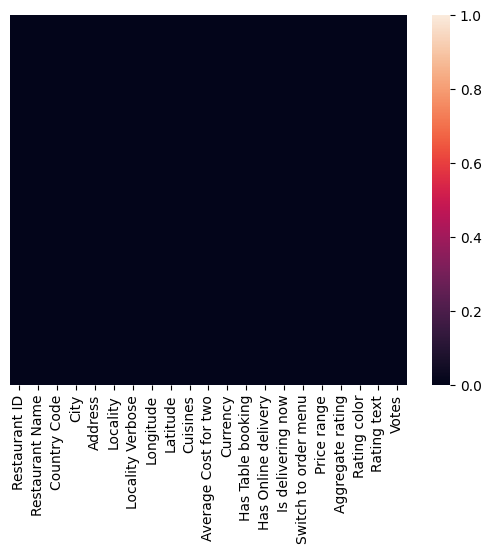

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,) 

In [12]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [14]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [15]:
country_names=final_df.Country.value_counts().index


In [16]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1e771dc9250>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

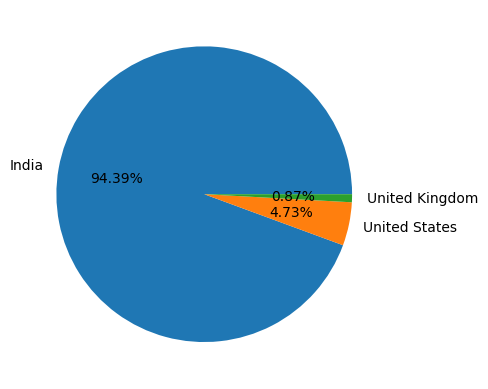

In [17]:
## Pie Chart- Top 3 countries that uses zomato
py.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

In [18]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [19]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<font size=30><b>Observation</b></font>

<li>When Rating is between 4.5 to 4.9---> Excellent
<li>When Rating are between 4.0 to 3.4--->very good
<li>when Rating is between 3.5 to 3.9----> good
<li>when Rating is between 3.0 to 3.4----> average
<li>when Rating is between 2.5 to 2.9----> average
<li>when Rating is between 2.0 to 2.4----> Poor</li>

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

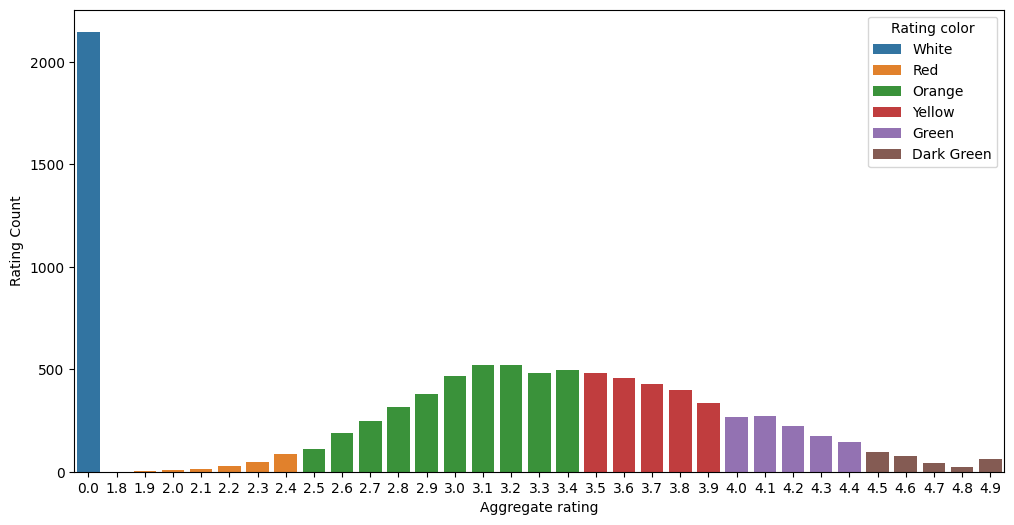

In [20]:
py.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",hue="Rating color",data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

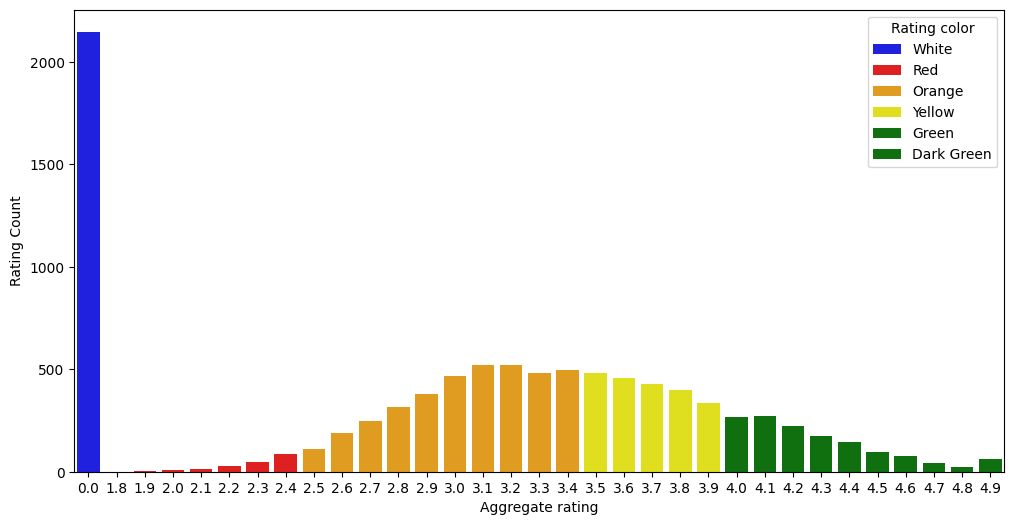

In [21]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

<font size=35><b>observation</b>
<ul>
    COUNT OF NOT RATED IS MORE
    <LI>ANOTHER MAXIMUM COUNT IS FROM 2.5 TO 3.5</LI>
</ul>

C:\Users\User\AppData\Local\Temp\ipykernel_14624\391877541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'],legend=False)


<Axes: xlabel='Rating color', ylabel='count'>

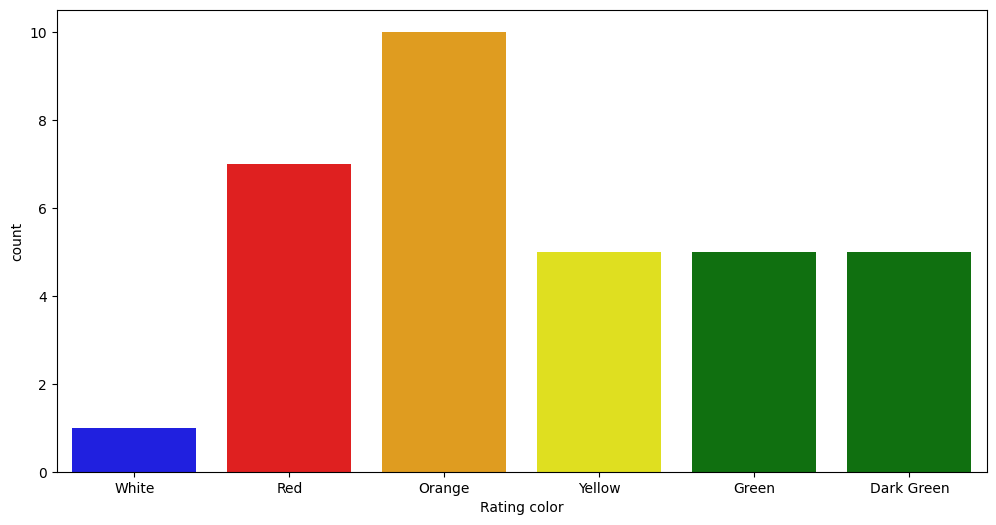

In [22]:
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'],legend=False)

In [23]:
### Find the countries name that has given 0 rating 
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()



,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [24]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


<font size=30><b>Maximum not rated are from india</b>

In [27]:
##find out which currency is used by which country?
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [32]:
final_df.groupby(['Country','Currency']).size().reset_index()


,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [34]:
## Which Countries do have online deliveries option
final_df.groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [36]:
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

Observations:

Online Deliveries are available in India and UAE

In [59]:
## Create a pie chart for top 5 cities distribution
cities_value=final_df.City.value_counts().values
cities_index=final_df.City.value_counts().index


([<matplotlib.patches.Wedge at 0x1e7785c50a0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31')])

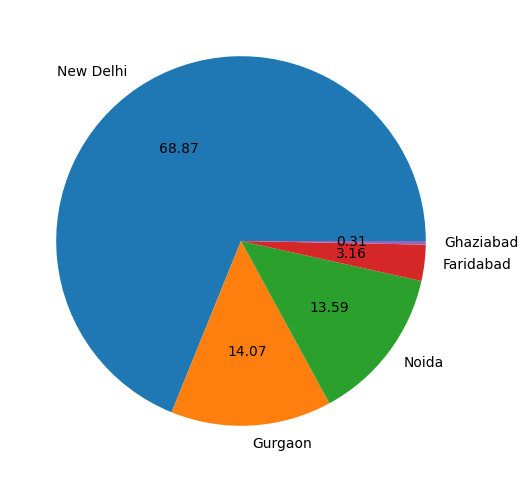

In [63]:
py.pie(cities_value[:5],labels=cities_index[:5],autopct='%1.2f')

In [65]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [68]:
final_df.Cuisines.value_counts().head(5)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [78]:
final_df.groupby(['City','Cuisines',]).size().reset_index()

,City,Cuisines,0
0,Abu Dhabi,American,2
1,Abu Dhabi,"American, Desserts",1
2,Abu Dhabi,"American, Mexican, Seafood",1
3,Abu Dhabi,Asian,1
4,Abu Dhabi,Chinese,1
...,...,...,...
3019,ÛÁstanbul,Restaurant Cafe,2
3020,ÛÁstanbul,"Restaurant Cafe, Desserts",1
3021,ÛÁstanbul,"Restaurant Cafe, Turkish, Desserts",1
3022,ÛÁstanbul,Turkish,1


                            Cuisines Rating text  count
1854                    North Indian   Not rated    444
1851                    North Indian     Average    366
1887           North Indian, Chinese     Average    303
2157           North Indian, Mughlai     Average    185
1170                       Fast Food     Average    151
698                          Chinese     Average    151
470                             Cafe     Average    132
701                          Chinese   Not rated    130
1173                       Fast Food   Not rated    126
2170  North Indian, Mughlai, Chinese     Average    122


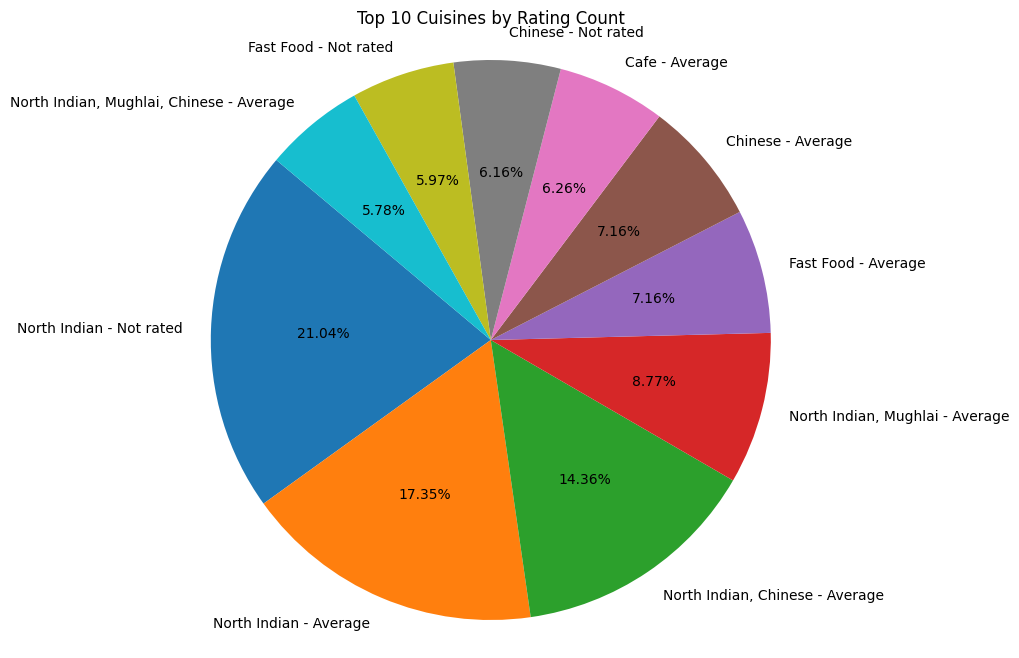

In [101]:
# Group by 'Cuisines' and 'Rating text', then count the occurrences
cuisine_rating_counts = final_df.groupby(['Cuisines', 'Rating text']).size().reset_index(name='count')

# Sort the data by count in descending order
cuisine_rating_counts = cuisine_rating_counts.sort_values(by='count', ascending=False)

# For the pie chart, we might want to limit the number of cuisines to a manageable number (e.g., top 10)
top_cuisines = cuisine_rating_counts.head(10)

# Display the top cuisines
print(top_cuisines)

# Plotting the pie chart for top cuisines
py.figure(figsize=(12, 8))
py.pie(top_cuisines['count'], labels=top_cuisines['Cuisines'] + ' - ' + top_cuisines['Rating text'], autopct='%1.2f%%', startangle=140)
py.title('Top 10 Cuisines by Rating Count')
py.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
py.show()

Description of the Pie Plot: Top 10 Cuisines by Rating Count
The pie chart illustrates the distribution of the top 10 cuisines based on their rating counts from the Zomato dataset. Each slice of the pie represents a specific cuisine and its corresponding rating text (e.g., "Italian - Excellent", "Chinese - Good"). The size of each slice is proportional to the number of occurrences of that particular cuisine-rating combination.

Key Insights:

Popularity of Cuisines: The chart highlights which cuisines are most frequently rated by users, offering insights into popular dining preferences.
Rating Distribution: By including the rating text in the labels, the pie chart provides a dual perspective on not just the type of cuisine but also the general sentiment (e.g., excellent, good) associated with it.
Top Cuisines: The largest slices indicate the most rated cuisines, showcasing the dominant food trends in the dataset.
This visual representation helps in quickly identifying the leading cuisines and their ratings, making it easier to understand customer preferences and satisfaction levels across different food types.